# Tech Challenge - Fase 2 (Machine Learning and Time Series)
## Integrantes do grupo 43

* **Gabriel Tomaz**
* **Meuriam Silva**
* **Pedro Costa**
* **Thiago Arag√£o**

**Importa√ß√£o das bibliotecas**

Importa√ß√£o das bibliotecas b√°sicas para importar a base de dados em um Dataframe e apresentar gr√°ficos, as outras bibliotecas est√£o sendo importadas conforme a necessidade na execu√ß√£o do notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importa√ß√£o da base de dados**

Os dados foram importados do [site Investing](https://br.investing.com/indices/bovespa-historical-data) usando o m√©todo pd.read_csv. A coluna de data foi identificada no par√¢metro "parse_dates" e as colunas de valores com os milhares separados por pontos e os decimais por v√≠rgulas.

In [2]:
df = pd.read_csv('/content/dados_historicos.csv', parse_dates=['Data'], thousands='.', decimal=',')
df.head()

<ipython-input-2-31e54afb7a61>:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/dados_historicos.csv', parse_dates=['Data'], thousands='.', decimal=',')


Data  √öltimo  Abertura  M√°xima  M√≠nima   Vol.    Var%
0 2024-07-26  127492    125964  127700  125953  8,27M   1,22%
1 2024-07-25  125954    126423  126423  125626  7,13B  -0,37%
2 2024-07-24  126423    126596  126823  126218  7,30B  -0,13%
3 2024-07-23  126590    127860  127860  126530  7,02B  -0,99%
4 2024-07-22  127860    127616  128151  127456  6,10B   0,19%

**Analise inicial da base de dados**

* **shape:** retorna uma tupla com as dimens√µes do DataFrame, onde o primeiro valor representa o n√∫mero de linhas e o segundo valor representa o n√∫mero de colunas.
* **info:** exibe o n√∫mero total de linhas, o n√∫mero de colunas, o nome de cada coluna, o tipo de dados de cada coluna, e a quantidade de valores n√£o nulos em cada coluna.

In [3]:
df.shape

(3610, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      3610 non-null   datetime64[ns]
 1   √öltimo    3610 non-null   int64         
 2   Abertura  3610 non-null   int64         
 3   M√°xima    3610 non-null   int64         
 4   M√≠nima    3610 non-null   int64         
 5   Vol.      3609 non-null   object        
 6   Var%      3610 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 197.5+ KB


**Renomear as colunas**

* **√öltimo:** Representa o √∫ltimo pre√ßo pelo qual o √≠ndice foi negociado antes do encerramento do mercado naquele dia.

* **Abertura:** Representa o primeiro pre√ßo pelo qual o √≠ndice foi negociado quando o mercado abriu naquele dia.

* **M√°xima:** Indica o ponto m√°ximo de pre√ßo alcan√ßado durante as negocia√ß√µes daquele dia.

* **M√≠nima:** Indica o ponto m√≠nimo de pre√ßo alcan√ßado durante as negocia√ß√µes daquele dia.

* **Vol. (Volume):** Refere-se ao n√∫mero total de a√ß√µes ou contratos negociados.

* **Var% (Varia√ß√£o Percentual):** Esta coluna mostra a varia√ß√£o percentual do √≠ndice em rela√ß√£o ao fechamento do dia anterior

In [5]:
df = df.rename(
    columns={
        'Data': 'DATA',
        'Vol.': 'VOLUME',
        '√öltimo': 'ULTIMO',
        'M√°xima': 'MAXIMA',
        'M√≠nima': 'MINIMA',
        'Abertura': 'ABERTURA',
        'Var%': 'VARIACAO_PERCENTUAL'
        }
    )
df.head()

DATA  ULTIMO  ABERTURA  MAXIMA  MINIMA VOLUME VARIACAO_PERCENTUAL
0 2024-07-26  127492    125964  127700  125953  8,27M               1,22%
1 2024-07-25  125954    126423  126423  125626  7,13B              -0,37%
2 2024-07-24  126423    126596  126823  126218  7,30B              -0,13%
3 2024-07-23  126590    127860  127860  126530  7,02B              -0,99%
4 2024-07-22  127860    127616  128151  127456  6,10B               0,19%

**Fun√ß√µes para fazer conver√ß√£o de valores na base de dados**
* **converter_volume:** Recebe uma string por par√¢metro e faz a convers√£o para o tipo int;
* **converter_percentage:** Recebe uma string por par√¢metro e faz a convers√£o para o tipo float

In [6]:
def converter_volume(volume):
  if pd.isna(volume):
    return 0
  if not volume:
    return 0
  if isinstance(volume, (int, float)):
    return int(volume)

  volume = volume.strip().upper().replace(',', '.')

  if volume[-1] == 'K':
    return int(float(volume[:-1]) * 1e3)
  elif volume[-1] == 'M':
    return int(float(volume[:-1]) * 1e6)
  elif volume[-1] == 'B':
    return int(float(volume[:-1]) * 1e9)
  else:
    return int(volume)

def converter_percentage(variacao_percentual):
  if pd.isna(variacao_percentual):
    return np.nan
  if isinstance(variacao_percentual, (int, float)):
    return float(variacao_percentual)

  variacao_percentual = variacao_percentual.strip().replace('%', '').replace(',', '.')

  try:
    return float(variacao_percentual)
  except ValueError:
    return np.nan

**Converter os dados da base**

No c√≥digo abaixo, as colunas "VOLUME" e "VARIACAO_PERCENTUAL" s√£o convertidas de strings para valores num√©ricos. A coluna de data √© definida como √≠ndice e os dados s√£o ordenados em ordem ascendente pelo indice.

In [7]:
df['VOLUME'] = df['VOLUME'].apply(converter_volume)
df['VARIACAO_PERCENTUAL'] = df['VARIACAO_PERCENTUAL'].apply(converter_percentage)
df = df.set_index('DATA')
df = df.sort_index(ascending = True)
df.head()

ULTIMO  ABERTURA  MAXIMA  MINIMA   VOLUME  VARIACAO_PERCENTUAL
DATA                                                                      
2010-01-04   70045     68587   70081   68587  1660000                 2.12
2010-01-05   70240     70046   70595   69928  1980000                 0.28
2010-01-06   70729     70236   70937   70016  2240000                 0.70
2010-01-07   70451     70723   70723   70045  1550000                -0.39
2010-01-08   70263     70455   70766   70158  1630000                -0.27

**Cria√ß√£o da matriz de corre√ß√£o entre as colunas**

No c√≥digo abaixo, √© criado um DataFrame que cont√©m a matriz de correla√ß√£o para as colunas "ULTIMO", "ABERTURA", "MAXIMO", "MINIMA", "VOLUME" e "VARIACAO_PERCENTUAL".

In [8]:
correlacao = df[['ULTIMO', 'ABERTURA', 'MAXIMA', 'MINIMA', 'VOLUME', 'VARIACAO_PERCENTUAL']].corr();
correlacao.head()

ULTIMO  ABERTURA    MAXIMA    MINIMA    VOLUME  \
ULTIMO    1.000000  0.999017  0.999572  0.999669  0.071624   
ABERTURA  0.999017  1.000000  0.999601  0.999409  0.072221   
MAXIMA    0.999572  0.999601  1.000000  0.999455  0.071264   
MINIMA    0.999669  0.999409  0.999455  1.000000  0.072542   
VOLUME    0.071624  0.072221  0.071264  0.072542  1.000000   

          VARIACAO_PERCENTUAL  
ULTIMO               0.026408  
ABERTURA            -0.015913  
MAXIMA               0.005178  
MINIMA               0.010327  
VOLUME              -0.008054

**Gr√°fico para melhorar a visualiza√ß√£o da matriz de correla√ß√£o**

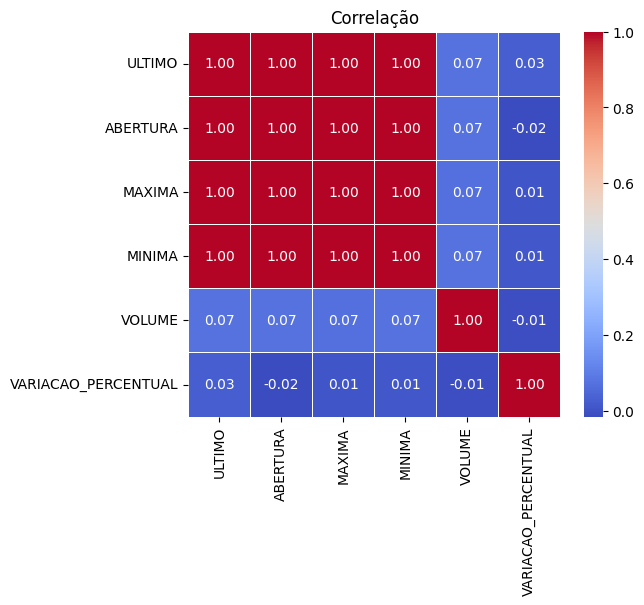

In [9]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correla√ß√£o')
plt.show()

**An√°lise das estat√≠sticas b√°sicas da coluna "Ultimo"**

O m√©todo "describe" fornece informa√ß√µes como a contagem de valores, m√©dia, desvio padr√£o, valores m√≠nimo e m√°ximo, al√©m dos quartis (25%, 50%, 75%).

In [10]:
df['ULTIMO'].describe()

count      3610.000000
mean      79656.462050
std       26435.323776
min       37497.000000
25%       56613.750000
50%       69343.500000
75%      105069.250000
max      134194.000000
Name: ULTIMO, dtype: float64

**Histograma referente a coluna "ULTIMO"**

√â um gr√°fico que representa a distribui√ß√£o de uma vari√°vel num√©rica atrav√©s de barras. Cada barra mostra a frequ√™ncia de dados dentro de intervalos espec√≠ficos, permitindo visualizar a forma, dispers√£o e tend√™ncias dos dados.

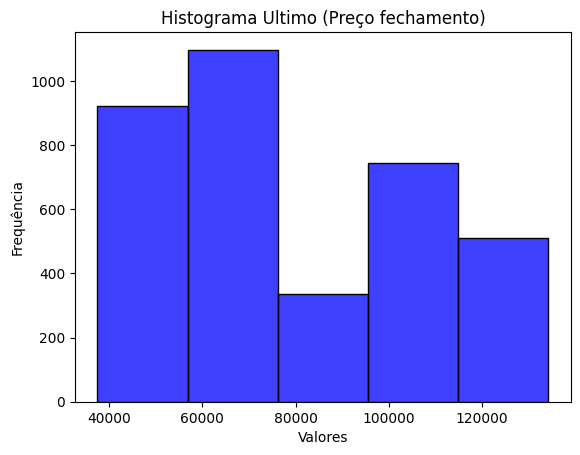

In [11]:
sns.histplot(df['ULTIMO'], bins=5, kde=False, color='blue')

plt.title('Histograma Ultimo (Pre√ßo fechamento)')
plt.xlabel('Valores')
plt.ylabel('Frequ√™ncia')

plt.show()

**Decomposi√ß√£o**
* Tend√™ncia
* Sazonalidade
* Ru√≠do

Entre o in√≠cio de 2010 e 2016, observamos uma leve tend√™ncia de queda. No entanto, a partir de 2016, a tend√™ncia mudou rapidamente, com um aumento significativo e cont√≠nuo.

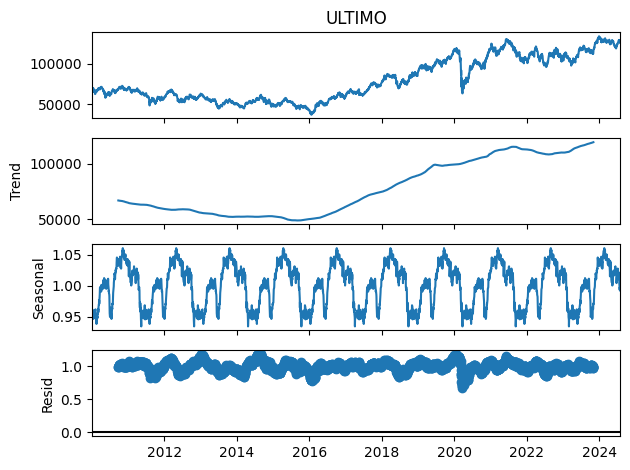

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(df.ULTIMO, model="multiplicative", period=365)
resultado.plot()
plt.show()

**Teste para verificar se a serie √© estacion√°ria**

O teste ADF (Augmented Dickey-Fuller) √© uma ferramenta estat√≠stica usada para verificar a estacionariedade de uma s√©rie temporal. Ele testa a hip√≥tese nula de que uma unidade raiz est√° presente na s√©rie, ou seja, que a s√©rie n√£o √© estacion√°ria. Um valor p menor que um determinado n√≠vel de signific√¢ncia (geralmente 0,05) indica que a s√©rie √© estacion√°ria.

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['ULTIMO'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("A s√©rie √© estacion√°ria")
else:
    print("A s√©rie n√£o √© estacion√°ria")

ADF Statistic: -0.7665874633289739
p-value: 0.8287403031406055
A s√©rie n√£o √© estacion√°ria


**Gr√°ficos ACF e PACF**

ACF (Autocorrelation Function): Ajuda a identificar a ordem do modelo de m√©dia m√≥vel (
ùëû
q). Picos significativos na ACF indicam que voc√™ deve considerar um termo MA correspondente.

PACF (Partial Autocorrelation Function): Ajuda a identificar a ordem do modelo autorregressivo (
ùëù
p). Picos significativos na PACF indicam que voc√™ deve considerar um termo AR correspondente.

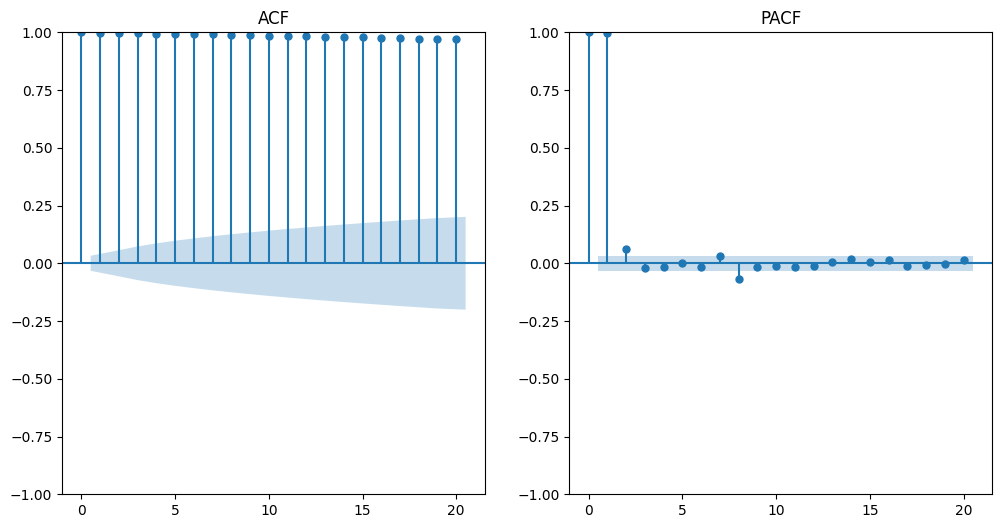

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['ULTIMO'], lags=20, ax=plt.gca())
plt.title('ACF')

plt.subplot(122)
plot_pacf(df['ULTIMO'], lags=20, ax=plt.gca())
plt.title('PACF')

plt.show()

**Novo Dataframe**

Cria√ß√£o de um DataFrame com duas colunas: "DATA" e "ULTIMO". Em seguida, as colunas foram renomeadas para "ds" e "y".

In [15]:
df_novo = df.reset_index()[['DATA', 'ULTIMO']]
df_novo = df_novo.rename(columns={'DATA':'ds','ULTIMO':'y'})

**Divis√£o da Base de Dados em Conjuntos de Treinamento e Teste**

Os dados de 01/01/2010 a 21/07/2024 ser√£o utilizados para treinar os modelos. Em seguida, validaremos o desempenho dos modelos utilizando os dados de teste.

In [16]:
treino = df_novo.loc[df_novo['ds'] <= '2024-07-21']
teste = df_novo.loc[(df_novo['ds'] >= '2024-07-22') & (df_novo['ds'] <= '2024-07-26')]

**Fun√ß√µes para calcular e apresentar as metricas de avalia√ß√£o dos modelos**

* **mean_absolute_error (MAE):** Calcula a m√©dia das diferen√ßas absolutas entre os valores previstos e os valores reais. Mede o erro m√©dio em unidades da vari√°vel de previs√£o.

* **mean_squared_error (MSE):** Calcula a m√©dia dos quadrados das diferen√ßas entre os valores previstos e os valores reais. Penaliza erros maiores mais fortemente do que o MAE, e √© sens√≠vel a outliers.

* **mean_absolute_percentage_error (MAPE):** Mede o erro m√©dio percentual entre os valores previstos e os valores reais. Expressa o erro como uma porcentagem, facilitando a compara√ß√£o de desempenho em diferentes escalas.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def calculate_metrics(y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 2)
    mse = round(mean_squared_error(y_true, y_pred), 2)
    mape = round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2)
    return mae, mse, mape

def print_metrics(metrics):
    mae, mse, mape = metrics
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"MAPE: {mape}")

**Modelo ARIMA**

O c√≥digo abaixo realizar√° o treinamento com o modelo ARIMA e identificar√° os melhores par√¢metros (p, d e q) para ajustar o ARIMA aos dados dispon√≠veis.

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Testando diferentes combina√ß√µes de p, d, q
melhor_aic = np.inf
melhor_order = None

p = 1  # ordem da parte autorregressiva
d = 1  # n√∫mero de diferencia√ß√µes
q = 1  # ordem da m√©dia m√≥vel

for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            try:
                arima_model = ARIMA(treino['y'], order=(p, d, q))
                arima_model_fit = arima_model.fit()
                aic = arima_model_fit.aic
                if aic < melhor_aic:
                    melhor_aic = aic
                    melhor_order = (p, d, q)
            except:
                continue

p = melhor_order[0]
d = melhor_order[1]
q = melhor_order[2]

print(f'Melhores par√¢metros: p={p}, d={d}, q={q}')

Melhores par√¢metros: p=2, d=1, q=2


**Treinando o ARIMA com a base de dados de treino e os melhores par√¢metros**

In [19]:
arima_model = ARIMA(treino['y'], order=(p, d, q))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(teste))

print(arima_forecast)

3605    127598.683167
3606    127569.932109
3607    127627.320987
3608    127559.344682
3609    127622.697481
Name: predicted_mean, dtype: float64


**Metricas do ARIMA**

In [20]:
metrics_arima = calculate_metrics(teste['y'], arima_forecast)
print("Metricas ARIMA:")
print_metrics(metrics_arima)

Metricas ARIMA:
MAE: 836.32
MSE: 1014631.17
MAPE: 0.66


**Cria√ß√£o do dataframe para apresentar o gr√°fico do inicio do dia 01/07/2024 a 26/07/2024**

In [21]:
data = pd.date_range(start= teste['ds'].min(), end=teste['ds'].max(), freq='B')
arima_forecast_df = pd.DataFrame({'ds': data, 'previsao': arima_forecast})
arima_forecast_df = df_novo.loc[df_novo['ds'] >= '2024-07-01'].merge(arima_forecast_df, how='left')
arima_forecast_df.tail()

ds       y       previsao
15 2024-07-22  127860  127598.683167
16 2024-07-23  126590  127569.932109
17 2024-07-24  126423  127627.320987
18 2024-07-25  125954  127559.344682
19 2024-07-26  127492  127622.697481

In [22]:
def converter_para_milhar(x, pos):
    return f'{x*1e-3:.0f}k'

**Gr√°fico apresentando os valores reais e o previsto pelo modelo ARIMA**

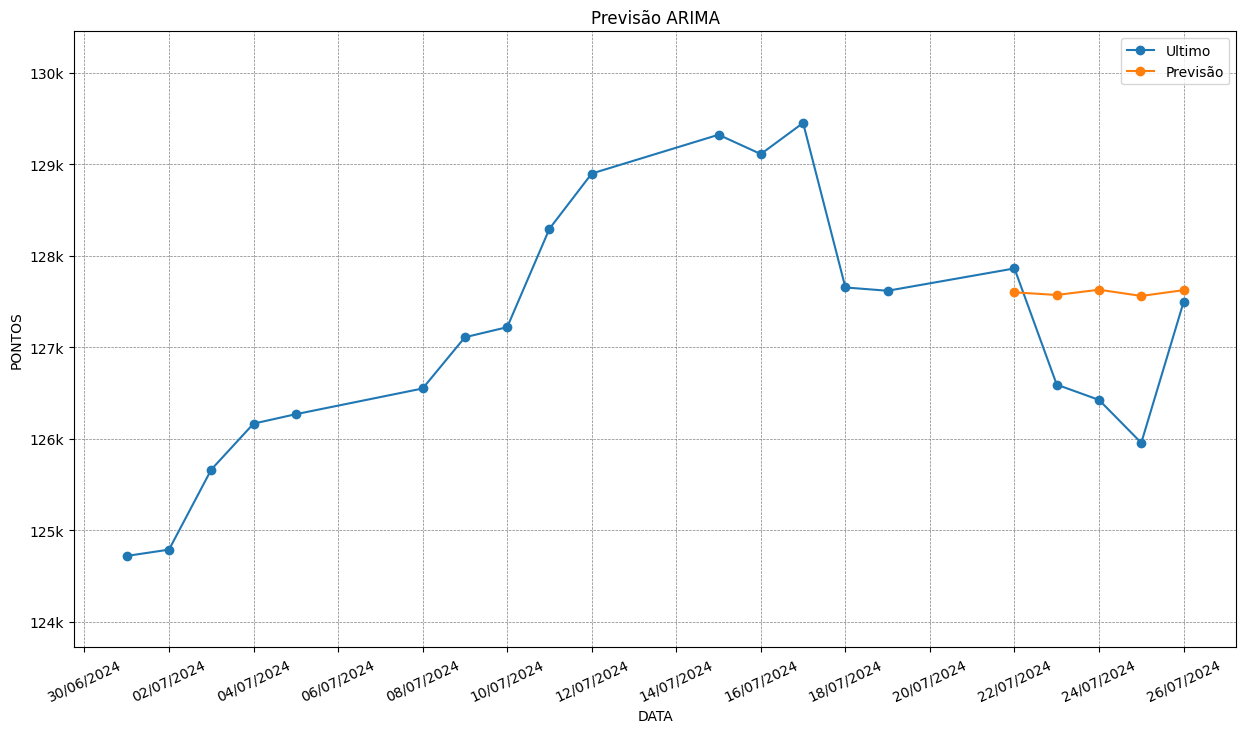

In [23]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter, MultipleLocator

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(arima_forecast_df['ds'], arima_forecast_df['y'], marker='o', label='Ultimo')
ax.plot(arima_forecast_df['ds'], arima_forecast_df['previsao'], marker='o', label='Previs√£o')

ax.legend()
ax.set_xlabel('DATA')
ax.set_ylabel('PONTOS')
ax.set_title('Previs√£o ARIMA')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Configura√ß√£o eixo X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Configura√ß√£o eixo Y
ax.yaxis.set_major_locator(MultipleLocator(1e3))
ax.yaxis.set_major_formatter(FuncFormatter(converter_para_milhar))
ax.set_ylim(arima_forecast_df['y'].min() - 1e3, arima_forecast_df['y'].max() + 1e3)

plt.xticks(rotation=25)
plt.show()

**Modelo Prophet**

Obs.: Ao contr√°rio do ARIMA, para o modelo Prophet foi necess√°rio reduzir o n√∫mero de dias para o treinamento. Com um conjunto de dados muito grande, o Prophet tendia a prever valores muito menores do que os reais, enquanto com um conjunto de dados muito pequeno, as previs√µes eram muito maiores.

In [24]:
from prophet import Prophet

prophet_model = Prophet(daily_seasonality=True)
treino = df_novo.loc[(df_novo['ds'] >= '2023-11-01') & (df_novo['ds'] <= '2024-07-21')]
prophet_model.fit(treino)

data = pd.date_range(start=teste['ds'].min(), end=teste['ds'].max(), freq='B')
prophet_future_df = pd.DataFrame({ 'ds': data })
prophet_forecast_df = prophet_model.predict(prophet_future_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83fj37b3/4q_jkws4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83fj37b3/7w1av_wi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33447', 'data', 'file=/tmp/tmp83fj37b3/4q_jkws4.json', 'init=/tmp/tmp83fj37b3/7w1av_wi.json', 'output', 'file=/tmp/tmp83fj37b3/prophet_modelqpf4yo_l/prophet_model-20240729112102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Metricas do Prophet**

In [25]:
metrics_prophet = calculate_metrics(teste['y'], prophet_forecast_df['yhat'])

print("Metricas Prophet:")
print_metrics(metrics_prophet)

Metricas Prophet:
MAE: 681.48
MSE: 762566.75
MAPE: 0.54


**Cria√ß√£o do dataframe para apresentar o m√™s de julho com o valor real e a previs√£o do modelo Prophet**

In [26]:
prophet_forecast_df = df_novo.loc[df_novo['ds'] >= '2024-07-01'].merge(prophet_forecast_df, how='left')
prophet_forecast_df[['ds', 'y', 'yhat']].tail()

ds       y           yhat
15 2024-07-22  127860  126300.864728
16 2024-07-23  126590  126720.274090
17 2024-07-24  126423  126497.084145
18 2024-07-25  125954  126711.851549
19 2024-07-26  127492  126605.923149

**Gr√°fico apresentando os valores reais e o previsto pelo modelo Prophet**

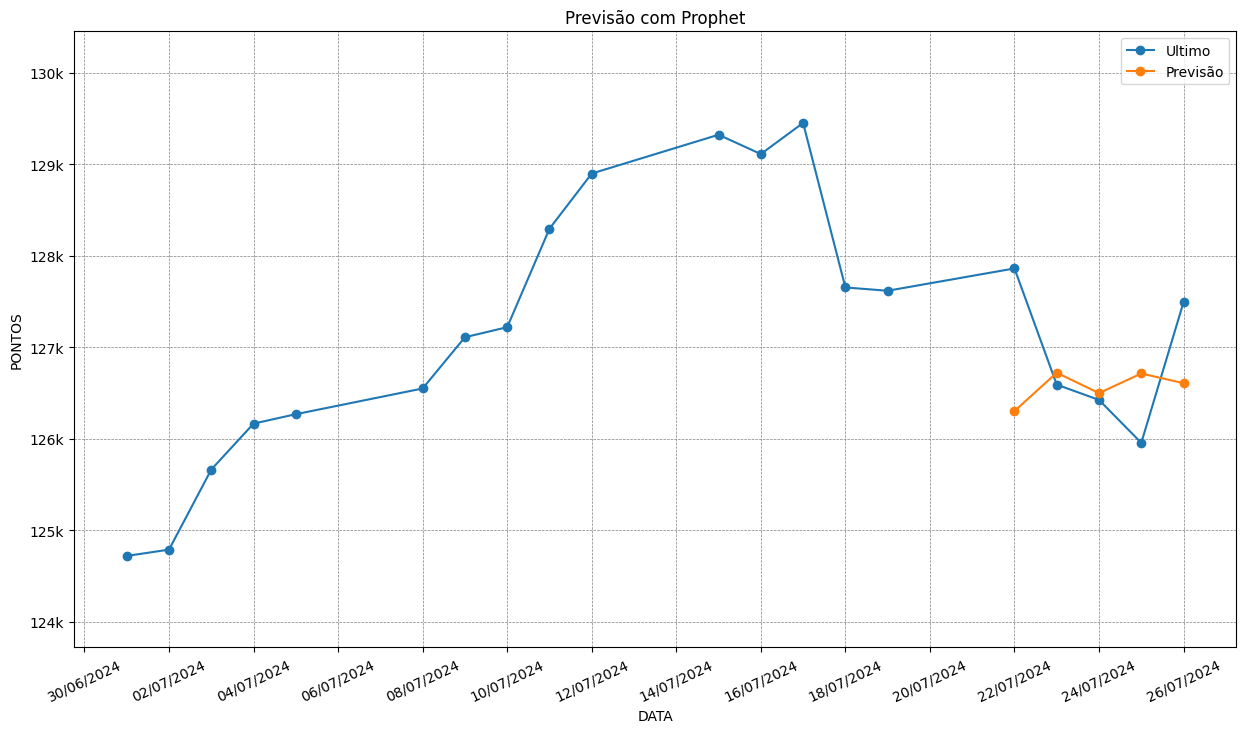

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(prophet_forecast_df['ds'], prophet_forecast_df['y'], marker='o', label='Ultimo')
ax.plot(prophet_forecast_df['ds'], prophet_forecast_df['yhat'], marker='o', label='Previs√£o')

ax.legend()
ax.set_xlabel('DATA')
ax.set_ylabel('PONTOS')
ax.set_title('Previs√£o com Prophet')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Configura√ß√£o eixo X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Configura√ß√£o eixo Y
ax.yaxis.set_major_locator(MultipleLocator(1e3))
ax.yaxis.set_major_formatter(FuncFormatter(converter_para_milhar))
ax.set_ylim(prophet_forecast_df['y'].min() - 1e3, prophet_forecast_df['y'].max() + 1e3)

plt.xticks(rotation=25)
plt.show()

**Tabela com as m√©tricas dos modelos**

* **MAE (Erro Absoluto M√©dio):** M√©dia dos erros absolutos entre previs√µes e valores reais. Menor MAE indica previs√µes mais precisas.
* **MSE (Erro Quadr√°tico M√©dio):** M√©dia dos erros quadrados entre previs√µes e valores reais. Penaliza mais erros grandes; menor MSE indica melhor acur√°cia.
* **MAPE (Erro Percentual Absoluto M√©dio):** M√©dia dos erros percentuais absolutos. Expressa o erro como uma porcentagem dos valores reais; menor MAPE indica previs√µes mais pr√≥ximas dos valores reais.

In [28]:
mae_arima, mse_arima, mape_arima = metrics_arima;
mae_prophet, mse_prophet, mape_prophet = metrics_prophet

df_metricas = pd.DataFrame({
    'Modelo': ['Prophet', 'ARIMA'],
    'MAE': [mae_prophet, mae_arima],
    'MSE': [mse_prophet, mse_arima],
    'MAPE': [mape_prophet, mape_arima]
})

df_metricas.head()

Modelo     MAE         MSE  MAPE
0  Prophet  681.48   762566.75  0.54
1    ARIMA  836.32  1014631.17  0.66

**Conclus√£o**

O modelo Prophet √© a melhor escolha, pois apresentou m√©tricas superiores em compara√ß√£o com o ARIMA. Al√©m disso, o Prophet necessitou de apenas 9 meses de dados para o treinamento (de novembro/2023 a julho/2024), enquanto o ARIMA exigiu um per√≠odo muito mais extenso, de janeiro/2010 a julho/2024.
